In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
df = pd.read_csv(r'/Users/manueltanguma/Downloads/imdb_labelled.txt', sep='\t', header=None)

In [3]:
df.head(5)

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
df.columns = ['review', 'hit']

In [5]:
columns_titles = ['hit', 'review']
df = df.reindex(columns=columns_titles)
df.head(5)

,hit,review
0,0,"A very, very, very slow-moving, aimless movie ..."
1,0,Not sure who was more lost - the flat characte...
2,0,Attempting artiness with black & white and cle...
3,0,Very little music or anything to speak of.
4,1,The best scene in the movie was when Gerardo i...


In [6]:
df.describe()

,hit
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
df['length']=df['review'].apply(len)
df.head(5)

,hit,review,length
0,0,"A very, very, very slow-moving, aimless movie ...",87
1,0,Not sure who was more lost - the flat characte...,99
2,0,Attempting artiness with black & white and cle...,188
3,0,Very little music or anything to speak of.,44
4,1,The best scene in the movie was when Gerardo i...,108


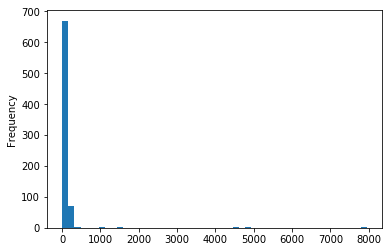

In [8]:
df['length'].plot(bins=50,kind='hist')

In [9]:
df.describe()

,hit,length
count,748.000000,748.000000
mean,0.516043,110.986631
std,0.500077,380.627728
min,0.000000,7.000000
25%,0.000000,42.750000
50%,1.000000,72.000000
75%,1.000000,112.250000
max,1.000000,7944.000000


In [10]:
df.length.describe()

count     748.000000
mean      110.986631
std       380.627728
min         7.000000
25%        42.750000
50%        72.000000
75%       112.250000
max      7944.000000
Name: length, dtype: float64

In [11]:
df[df['length']==7944]['review'].iloc[0]

' In fact, it\'s hard to remember that the part of Ray Charles is being acted, and not played by the man himself.  \t1\nRay Charles is legendary.  \t1\nRay Charles\' life provided excellent biographical material for the film, which goes well beyond being just another movie about a musician.  \t1\nHitchcock is a great director.  \t1\nIronically I mostly find his films a total waste of time to watch.  \t0\nSecondly, Hitchcock pretty much perfected the thriller and chase movie.  \t1\nIt\'s this pandering to the audience that sabotages most of his films.  \t0\nHence the whole story lacks a certain energy.  \t0\nThe plot simply rumbles on like a machine, desperately depending on the addition of new scenes.  \t0\nThere are the usual Hitchcock logic flaws.  \t0\nMishima is extremely uninteresting.  \t0\nThis is a chilly, unremarkable movie about an author living/working in a chilly abstruse culture.  \t0\nThe flat reenactments don\'t hold your attention because they are emotionally adrift and

In [12]:
df[df['length']==7]['review'].iloc[0]

'10/10  '

In [13]:
import string
messy = 'This is a sample messy text!!!!...'
nostruct=[char for char in messy if char not in string.punctuation]
nostruct=''.join(nostruct)
print(nostruct)


This is a sample messy text


In [14]:
import nltk

In [15]:
from nltk.corpus import stopwords
stopwords.words('english')[0:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [16]:
nostruct.split()
print (nostruct)

This is a sample messy text


In [17]:
strain_messy=[word for word in nostruct.split() if word.lower() not in stopwords.words('english')]

In [18]:
print (strain_messy)

['sample', 'messy', 'text']


In [19]:
#making a function to process data later
def text_analyzer(messy):
    nostruct=[char for char in messy if char not in string.punctuation]
    nostruct=''.join(nostruct)
    return [word for word in nostruct.split() if word.lower() not in stopwords.words('english')]


In [20]:
# Relook this area may have thrown rest of code off
df['review'] = df['review'].apply(text_analyzer)

In [21]:
df.head(5)

,hit,review,length
0,0,"[slowmoving, aimless, movie, distressed, drift...",87
1,0,"[sure, lost, flat, characters, audience, nearl...",99
2,0,"[Attempting, artiness, black, white, clever, c...",188
3,0,"[little, music, anything, speak]",44
4,1,"[best, scene, movie, Gerardo, trying, find, so...",108


In [22]:
ml_df = df

In [23]:
ml_df.head(5)

,hit,review,length
0,0,"[slowmoving, aimless, movie, distressed, drift...",87
1,0,"[sure, lost, flat, characters, audience, nearl...",99
2,0,"[Attempting, artiness, black, white, clever, c...",188
3,0,"[little, music, anything, speak]",44
4,1,"[best, scene, movie, Gerardo, trying, find, so...",108


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
#bag of words
bow_transformer = CountVectorizer(analyzer=text_analyzer).fit(ml_df['review'])
print(len(bow_transformer.vocabulary_))

744


In [26]:
#using .transform on the bag of words object
reviews_bow = bow_transformer.transform(ml_df['review'])

In [27]:
print('Shape of Sparse Matrix: ',reviews_bow.shape)
print('Amount of non-zero occurences:',reviews_bow.nnz)

Shape of Sparse Matrix:  (748, 744)
Amount of non-zero occurences: 748


In [28]:
sparsity =(100.0 * reviews_bow.nnz/(reviews_bow.shape[0]*reviews_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))


sparsity:0


In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(reviews_bow)
tfidf = tfidf_transformer.transform(reviews_bow)
print(tfidf)

  (0, 662)	1.0
  (1, 685)	1.0
  (2, 19)	1.0
  (3, 480)	1.0
  (4, 280)	1.0
  (5, 618)	1.0
  (6, 219)	1.0
  (7, 182)	1.0
  (8, 282)	1.0
  (9, 135)	1.0
  (10, 269)	1.0
  (11, 537)	1.0
  (12, 189)	1.0
  (13, 37)	1.0
  (14, 622)	1.0
  (15, 265)	1.0
  (16, 621)	1.0
  (17, 110)	1.0
  (18, 590)	1.0
  (19, 680)	1.0
  (20, 398)	1.0
  (21, 360)	1.0
  (22, 163)	1.0
  (23, 172)	1.0
  (24, 86)	1.0
  :	:
  (723, 196)	1.0
  (724, 316)	1.0
  (725, 117)	1.0
  (726, 722)	1.0
  (727, 725)	1.0
  (728, 123)	1.0
  (729, 454)	1.0
  (730, 626)	1.0
  (731, 647)	1.0
  (732, 492)	1.0
  (733, 197)	1.0
  (734, 178)	1.0
  (735, 541)	1.0
  (736, 623)	1.0
  (737, 16)	1.0
  (738, 561)	1.0
  (739, 75)	1.0
  (740, 128)	1.0
  (741, 483)	1.0
  (742, 546)	1.0
  (743, 420)	1.0
  (744, 213)	1.0
  (745, 733)	1.0
  (746, 73)	1.0
  (747, 448)	1.0


In [30]:
reviews_tfidf=tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)


(748, 744)


In [32]:
from sklearn.naive_bayes import MultinomialNB
reviews_detect_model = MultinomialNB().fit(reviews_tfidf,ml_df['hit'])

In [33]:
print('predicted:',reviews_detect_model.predict(tfidf)[0])
print('expected:',ml_df.hit[3])


predicted: 0
expected: 0


In [34]:
all_predictions = reviews_detect_model.predict(reviews_tfidf)
print(all_predictions)


[0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 

### TP|FP
### FN|TN


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ml_df['hit'],all_predictions))
print(confusion_matrix(ml_df['hit'],all_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       362
          1       1.00      1.00      1.00       386

avg / total       1.00      1.00      1.00       748

[[362   0]
 [  0 386]]


In [36]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(ml_df['review'],ml_df['hit'],test_size=0.2)


In [37]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

598 150 598 150


In [39]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_analyzer)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])


In [40]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_analyzer at 0x1a1dfced90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [41]:
predictions = pipeline.predict(msg_test)

In [42]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

          0       0.01      1.00      0.02         1
          1       1.00      0.46      0.63       149

avg / total       0.99      0.46      0.62       150

